In [5]:
import sys
if '../' not in sys.path:
    sys.path = ['../'] + sys.path

# Incorporate Jiaxuan's data

In [75]:
pink = 'myPink'
red = 'myRed'
green = 'myGreen'
lime = 'myLime'
shock = [
    ('Respiratory rate', pink),
    ('Height', pink),
    ('Mean blood pressure', red),
    ('Heart Rate', red),
    ('Fraction inspired oxygen', red),
    ('pH', red),
    #('Capillary refill rate->1.0', red),
    ('Weight', red),
    #('Capillary refill rate->0.0', lime),
    ('Glucose', lime),
    ('Oxygen saturation', lime),
    ('Systolic blood pressure', lime),
    ('Diastolic blood pressure', lime),
    ('Temperature', green)
]

ARF = [
    ('pH', pink),
    ('Oxygen saturation', red),
    ('Weight', pink),
    ('Respiratory rate', pink),
    ('Fraction inspired oxygen', red),
    ('Heart Rate', red),
    ('Height', pink),
    #('Capillary refill rate->1.0', pink),
    ('Glucose', lime),
    ('Systolic blood pressure', lime),
    #('Capillary refill rate->0.0', lime),
    ('Mean blood pressure', lime),
    ('Temperature', lime),
    ('Diastolic blood pressure', lime)
]

mortality = [
    ('Respiratory rate', pink),
    ('Heart Rate', pink),
    ('Glucose', pink),
    #('Capillary refill rate->1.0', red),
    ('Fraction inspired oxygen', red),
    ('Height', lime),
    #('Capillary refill rate->0.0', green),
    ('Weight', green),
    ('Systolic blood pressure', lime),
    ('pH', lime),
    ('Mean blood pressure', lime),
    ('Diastolic blood pressure', lime),
    ('Oxygen saturation', lime),
    ('Temperature', lime)
]

for a, s, m in list(zip(ARF, shock, mortality)):
    print(' & '.join(map(lambda x: '\\cellcolor{{{}}}{}'.format(x[1], x[0].replace('->','-')),[a, s, m])) + r"\\")

\cellcolor{myPink}pH & \cellcolor{myPink}Respiratory rate & \cellcolor{myPink}Respiratory rate\\
\cellcolor{myRed}Oxygen saturation & \cellcolor{myPink}Height & \cellcolor{myPink}Heart Rate\\
\cellcolor{myPink}Weight & \cellcolor{myRed}Mean blood pressure & \cellcolor{myPink}Glucose\\
\cellcolor{myPink}Respiratory rate & \cellcolor{myRed}Heart Rate & \cellcolor{myRed}Fraction inspired oxygen\\
\cellcolor{myRed}Fraction inspired oxygen & \cellcolor{myRed}Fraction inspired oxygen & \cellcolor{myLime}Height\\
\cellcolor{myRed}Heart Rate & \cellcolor{myRed}pH & \cellcolor{myGreen}Weight\\
\cellcolor{myPink}Height & \cellcolor{myRed}Weight & \cellcolor{myLime}Systolic blood pressure\\
\cellcolor{myLime}Glucose & \cellcolor{myLime}Glucose & \cellcolor{myLime}pH\\
\cellcolor{myLime}Systolic blood pressure & \cellcolor{myLime}Oxygen saturation & \cellcolor{myLime}Mean blood pressure\\
\cellcolor{myLime}Mean blood pressure & \cellcolor{myLime}Systolic blood pressure & \cellcolor{myLime}Diastoli

In [143]:
def fill_list(fn):
    df = pd.read_csv(fn)
    
    mylist = []
    for delta, name, importance in df.sort_values(by=['overall importance'], ascending=False).values:
        if '->' in name:
            continue
        
        if delta >= 0 and importance <= 0:
            mylist.append((name, 'myLime'))
        elif delta >= 0 and importance >= 0:
            mylist.append((name, 'myRed'))
        elif delta <= 0 and importance <= 0:
            mylist.append((name, 'myGreen'))
        else:
            mylist.append((name, 'myPink'))
    return mylist

#ARF = fill_list('perm_ARF.csv')
#shock = fill_list('perm_shock.csv')
#mortality = fill_list('perm_mortality.csv')

#for a, s, m in list(zip(ARF, shock, mortality)):
#    print(' & '.join(map(lambda x: '\\cellcolor{{{}}}{}'.format(x[1], x[0].replace('->','-')),[a, s, m])) + r"\\")
    
fn = 'perm_mortality.csv'
df = pd.read_csv(fn)
importance = np.percentile(df['overall importance'], 80)
df[df['overall importance'] > importance].sort_values(by=['importance@47'], ascending=False)



,delta from hour 1 to hour 48,feature,importance@0,importance@1,importance@10,importance@11,importance@12,importance@13,importance@14,importance@15,...,importance@44,importance@45,importance@46,importance@47,importance@5,importance@6,importance@7,importance@8,importance@9,overall importance
56,-0.002721,Temperature,0.007240,0.007240,0.007240,0.007240,-0.000196,-0.000196,-0.000196,-0.000196,...,0.004519,0.004519,0.004519,0.004519,0.007240,0.007240,0.007240,0.007240,0.007240,0.003778
50,-0.001581,Heart Rate,0.005030,0.005030,0.005030,0.005030,0.000049,0.000049,0.000049,0.000049,...,0.003449,0.003449,0.003449,0.003449,0.005030,0.005030,0.005030,0.005030,0.005030,0.002211
75,-0.002261,mask->pH,0.004782,0.004782,0.004782,0.004782,0.000222,0.000222,0.000222,0.000222,...,0.002522,0.002522,0.002522,0.002522,0.004782,0.004782,0.004782,0.004782,0.004782,0.002019
21,0.002718,Glascow coma scale motor response->6 Obeys Com...,-0.000213,-0.000213,-0.000213,-0.000213,-0.000802,-0.000802,-0.000802,-0.000802,...,0.002505,0.002505,0.002505,0.002505,-0.000213,-0.000213,-0.000213,-0.000213,-0.000213,0.000732
43,0.002366,Glascow coma scale verbal response->5 Oriented,0.000076,0.000076,0.000076,0.000076,0.000802,0.000802,0.000802,0.000802,...,0.002442,0.002442,0.002442,0.002442,0.000076,0.000076,0.000076,0.000076,0.000076,0.001064
41,-0.001641,Glascow coma scale verbal response->Oriented,0.003306,0.003306,0.003306,0.003306,0.000100,0.000100,0.000100,0.000100,...,0.001665,0.001665,0.001665,0.001665,0.003306,0.003306,0.003306,0.003306,0.003306,0.001604
55,-0.002833,Systolic blood pressure,0.003422,0.003422,0.003422,0.003422,0.002712,0.002712,0.002712,0.002712,...,0.000589,0.000589,0.000589,0.000589,0.003422,0.003422,0.003422,0.003422,0.003422,0.002822
66,-0.011150,mask->Glucose,0.011400,0.011400,0.011400,0.011400,0.000556,0.000556,0.000556,0.000556,...,0.000250,0.000250,0.000250,0.000250,0.011400,0.011400,0.011400,0.011400,0.011400,0.003129
65,-0.003755,mask->Glascow coma scale verbal response,0.003931,0.003931,0.003931,0.003931,0.000174,0.000174,0.000174,0.000174,...,0.000176,0.000176,0.000176,0.000176,0.003931,0.003931,0.003931,0.003931,0.003931,0.001108
69,-0.003923,mask->Mean blood pressure,0.004075,0.004075,0.004075,0.004075,0.000262,0.000262,0.000262,0.000262,...,0.000153,0.000153,0.000153,0.000153,0.004075,0.004075,0.004075,0.004075,0.004075,0.001130


IHM/save/real_mow-2.ckpt
d: 76, h: 150


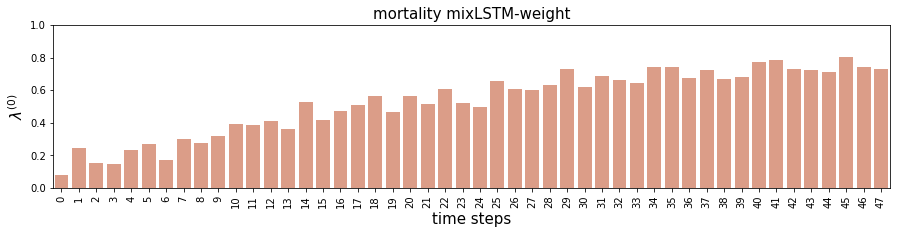

shock/save/Shock_mow-2.ckpt
d: 76, h: 150


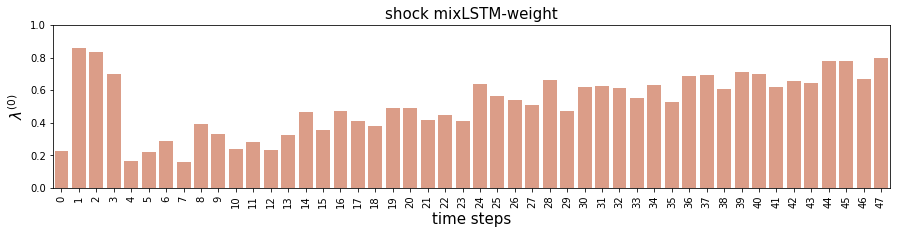

shock/save/ARF_mow-2.ckpt
d: 76, h: 50


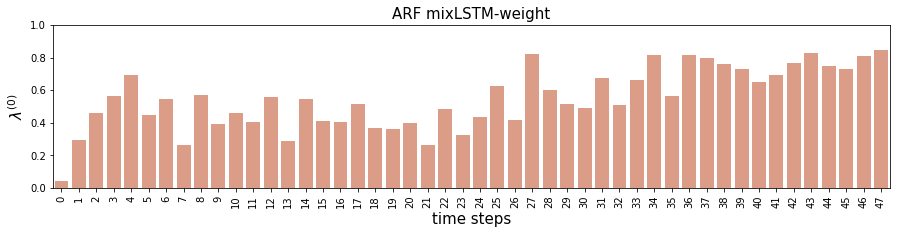

IHM/save/real_moo-2.ckpt
d: 76, h: 100


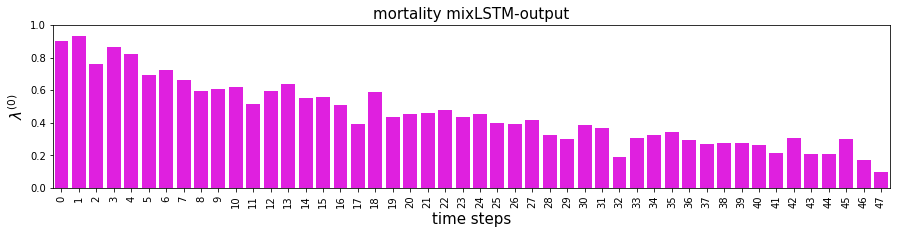

shock/save/Shock_moo-2.ckpt
d: 76, h: 25


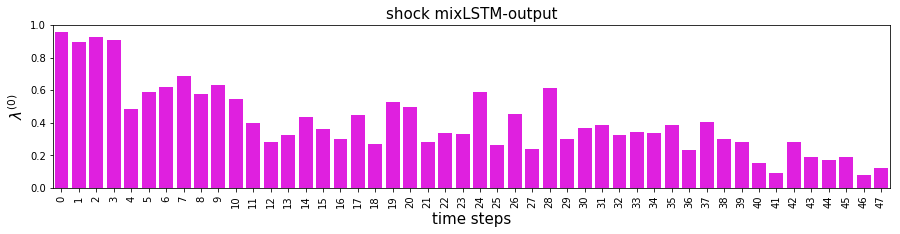

shock/save/ARF_moo-2.ckpt
d: 76, h: 50


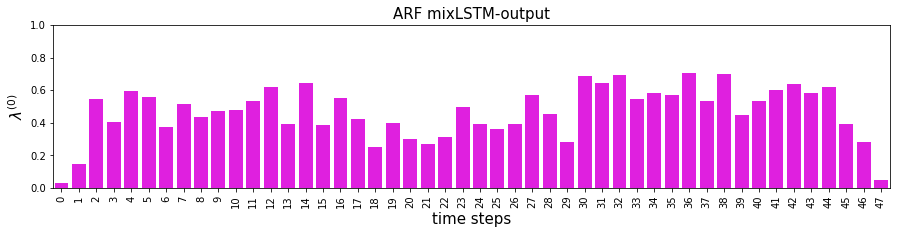

In [7]:
# Jiaxuan visulization code
from torch.utils.data import TensorDataset
import tqdm 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob, os, torch
from synthetic.LSTM11q_models import mowLSTM as mowSyn, mooLSTM as mooSyn
from IHM.LSTM11r_models import mowLSTM as mowIHM, mooLSTM as mooIHM
from shock.LSTM11s_models import mowLSTM as mowShock, mooLSTM as mooShock

def normalize_filename(fn):
    # return ckpt and args filenames
    assert "mow" in fn or "moo" in fn, "must be mow or moo"
    return fn + ".ckpt", fn + "_testscores.npz"

def load_data(path):
    data = np.load(path)
    x = torch.from_numpy(data['data']).float()
    # x: (N, seq_len, d)                                                
    y = torch.from_numpy(data['labels'])
    return TensorDataset(x, y)

def load_model(fn):
    fn, args_fn = normalize_filename(fn)
    print(fn)
    args = np.load(args_fn)['args'].item()
    
    print('d: {}, h: {}'.format(args['d'], args['hidden_size']))
    if 'val_loss' in args:
        print('val_loss: {:.2f}'.format(args['val_loss']))
        
    if 'moo' in fn:
        if 'synthetic' in fn:
            m = mooSyn(args)
        elif 'IHM' in fn:
            m = mooIHM(args)
        elif 'shock' in fn:
            m = mooShock(args)
    else:
        if 'synthetic' in fn:
            m = mowSyn(args)
        elif 'IHM' in fn:
            m = mowIHM(args)
        elif 'shock' in fn:
            m = mowShock(args)

    m.load_state_dict(torch.load(fn))
    return m

def coef_case_study(fn, gatenum=0):
    m = load_model(fn).model
    
    fn, args_fn = normalize_filename(fn)
    args = np.load(args_fn)['args'].item()    
    
    # plot trend
    gate_p = torch.nn.functional.softmax(m.coef, dim=1).detach().cpu().numpy()
    gate = gate_p[:, gatenum]
    df = pd.DataFrame({'time': np.arange(len(gate)), 'gate_val': gate})
    color = "magenta" if 'moo' in fn else "darksalmon"
    g = sns.barplot(x='time', y='gate_val', data=df, color=color)
    plt.xticks(rotation=90)

    title = ""
    if 'real' in args['modelname']:
        title += "mortality"
    elif 'Shock' in args['modelname']:
        title += "shock"
    elif 'ARF' in args['modelname']:
        title += 'ARF'
    if 'mow' in args['modelname']:
        title += " mixLSTM-weight"
    elif 'moo' in args['modelname']:
        title += " mixLSTM-output"
    
    plt.title(title, fontsize=15)
    plt.xlabel("time steps", fontsize=15)
    plt.ylabel(r"$\lambda^{(0)}$", fontsize=15)
    plt.ylim([0,1])
    plt.gcf().set_size_inches(15, 3)
    plt.savefig('figures/{}.eps'.format(args['modelname']), bbox_inches='tight')
    plt.show()
    
    return args
        
#fn = 'synthetic/save/mow-0.40_0_mowLSTM'

fns = ['IHM/save/real_mow-2',
       'shock/save/Shock_mow-2',
       'shock/save/ARF_mow-2',
       'IHM/save/real_moo-2',
       'shock/save/Shock_moo-2',
       'shock/save/ARF_moo-2']

for fn in fns:
    args = coef_case_study(fn)

shock/save/ARF_mow-2.ckpt
d: 76, h: 50
shock/save/Shock_mow-2.ckpt
d: 76, h: 150
IHM/save/real_mow-2.ckpt
d: 76, h: 150


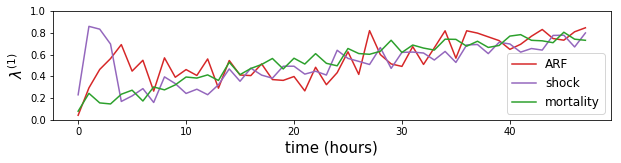

In [145]:
def coef_comparison_helper(fn, color, gatenum=0):
    m = load_model(fn).model
    
    fn, args_fn = normalize_filename(fn)
    args = np.load(args_fn)['args'].item()    
    
    # plot trend
    gate_p = torch.nn.functional.softmax(m.coef, dim=1).detach().cpu().numpy()
    gate = gate_p[:, gatenum]
    
    #color = "magenta" if 'moo' in fn else "darksalmon"
    title = ""
    if 'real' in args['modelname']:
        title += "mortality"
    elif 'Shock' in args['modelname']:
        title += "shock"
    elif 'ARF' in args['modelname']:
        title += 'ARF'
    #if 'mow' in args['modelname']:
    #    title += " mixLSTM-weight"
    #elif 'moo' in args['modelname']:
    #    title += " mixLSTM-output"
    
    plt.plot(gate, color=color, 
             label=title)
    plt.xticks(rotation=0)

    plt.xlabel("time (hours)", fontsize=15)
    plt.ylabel(r"$\lambda^{(1)}$", fontsize=15)
    plt.ylim([0,1])
    plt.gcf().set_size_inches(10, 2)
    #plt.savefig('figures/{}.eps'.format(args['modelname']), bbox_inches='tight')
    #plt.show()
    #return args

def coef_comparison(fns, colors=['purple', 'red', 'green']):
    
    for i, fn in enumerate(fns):
        coef_comparison_helper(fn, colors[i])
    #plt.legend(fontsize=15)
    plt.gca().legend(loc='lower right', fontsize=12)#, bbox_to_anchor=(0, 0))    
    #plt.title('Mixing weights visualization on 3 tasks for mixLSTM-weight-2', fontsize=15)
    plt.savefig('figures/mixing_weights_vis.eps', bbox_inches='tight')
    plt.show()
    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
color_dict = {'LSTM':colors[0], 'shiftLSTM-30':colors[1], 'IHM':colors[2],\
              'ARF':colors[3], 'Shock':colors[4], 'mixLSTM-output':'darkmagenta',\
             'mixLSTM-2':'darksalmon'}
marker_dict = {'LSTM':'v', 'shiftLSTM-30':'o', 'IHM':'x','ARF':'s','Shock':"*",\
              'mixLSTM-output':'D', 'mixLSTM-2':'s'}

fns = [
    'shock/save/ARF_mow-2',
    'shock/save/Shock_mow-2',
    'IHM/save/real_mow-2',
       #'IHM/save/real_moo-2',
       #'shock/save/Shock_moo-2',
       #'shock/save/ARF_moo-2'
]


coef_comparison(fns, colors=[color_dict['ARF'], color_dict['Shock'], color_dict['IHM']])

In [22]:
# weight visualization: adapted from https://github.com/utkuozbulak/pytorch-cnn-visualizations/blob/master/src/vanilla_backprop.py
import tqdm
from IHM.LSTM11r_datagen import IHM_data
from shock.LSTM11s_datagen import real_data
from sklearn.externals import joblib

class VanillaBackprop():
    """
        Produces gradients generated with vanilla back propagation from the image
    """
    def __init__(self, model):
        self.model = model
        self.gradients = None
        # Put model in evaluation mode
        self.model.train()

    def generate_gradients(self, x, target_class):
        # Forward
        x.requires_grad = True
        model_output = self.model(x)
        # Zero grads
        self.model.zero_grad()
        bs, T, o_size = model_output.shape
        # Target for backprop
        one_hot_output = torch.zeros_like(model_output)
        one_hot_output[:,:,target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert Pytorch variable to numpy array
        gradients_as_arr = x.grad.cpu().data.numpy()[0]
        return gradients_as_arr

index_to_name = ['Capillary refill rate->0.0',
 'Capillary refill rate->1.0',
 'Diastolic blood pressure',
 'Fraction inspired oxygen',
 'Glascow coma scale eye opening->To Pain',
 'Glascow coma scale eye opening->3 To speech',
 'Glascow coma scale eye opening->1 No Response',
 'Glascow coma scale eye opening->4 Spontaneously',
 'Glascow coma scale eye opening->None',
 'Glascow coma scale eye opening->To Speech',
 'Glascow coma scale eye opening->Spontaneously',
 'Glascow coma scale eye opening->2 To pain',
 'Glascow coma scale motor response->1 No Response',
 'Glascow coma scale motor response->3 Abnorm flexion',
 'Glascow coma scale motor response->Abnormal extension',
 'Glascow coma scale motor response->No response',
 'Glascow coma scale motor response->4 Flex-withdraws',
 'Glascow coma scale motor response->Localizes Pain',
 'Glascow coma scale motor response->Flex-withdraws',
 'Glascow coma scale motor response->Obeys Commands',
 'Glascow coma scale motor response->Abnormal Flexion',
 'Glascow coma scale motor response->6 Obeys Commands',
 'Glascow coma scale motor response->5 Localizes Pain',
 'Glascow coma scale motor response->2 Abnorm extensn',
 'Glascow coma scale total->11',
 'Glascow coma scale total->10',
 'Glascow coma scale total->13',
 'Glascow coma scale total->12',
 'Glascow coma scale total->15',
 'Glascow coma scale total->14',
 'Glascow coma scale total->3',
 'Glascow coma scale total->5',
 'Glascow coma scale total->4',
 'Glascow coma scale total->7',
 'Glascow coma scale total->6',
 'Glascow coma scale total->9',
 'Glascow coma scale total->8',
 'Glascow coma scale verbal response->1 No Response',
 'Glascow coma scale verbal response->No Response',
 'Glascow coma scale verbal response->Confused',
 'Glascow coma scale verbal response->Inappropriate Words',
 'Glascow coma scale verbal response->Oriented',
 'Glascow coma scale verbal response->No Response-ETT',
 'Glascow coma scale verbal response->5 Oriented',
 'Glascow coma scale verbal response->Incomprehensible sounds',
 'Glascow coma scale verbal response->1.0 ET/Trach',
 'Glascow coma scale verbal response->4 Confused',
 'Glascow coma scale verbal response->2 Incomp sounds',
 'Glascow coma scale verbal response->3 Inapprop words',
 'Glucose',
 'Heart Rate',
 'Height',
 'Mean blood pressure',
 'Oxygen saturation',
 'Respiratory rate',
 'Systolic blood pressure',
 'Temperature',
 'Weight',
 'pH',
 'mask->Capillary refill rate',
 'mask->Diastolic blood pressure',
 'mask->Fraction inspired oxygen',
 'mask->Glascow coma scale eye opening',
 'mask->Glascow coma scale motor response',
 'mask->Glascow coma scale total',
 'mask->Glascow coma scale verbal response',
 'mask->Glucose',
 'mask->Heart Rate',
 'mask->Height',
 'mask->Mean blood pressure',
 'mask->Oxygen saturation',
 'mask->Respiratory rate',
 'mask->Systolic blood pressure',
 'mask->Temperature',
 'mask->Weight',
 'mask->pH']

def grad_visualize_helper(net, data):
    vbp = VanillaBackprop(net)
    grad = 0
    count = 0
    for x, y in tqdm.tqdm(data):
        bs = x.shape[0]
        count += bs
        grad += vbp.generate_gradients(x.cuda(), target_class=1) * bs
    return grad / count

def grad_visualize(fn):
    print(fn)
    net = load_model(fn).cuda()

    _, args_fn = normalize_filename(fn)
    args = np.load(args_fn)['args'].item()
    if 'real' in fn:
        dataset = IHM_data('test', args)
    elif 'Shock' in fn or 'ARF' in fn:
        dataset = real_data('test', args)
    data = torch.utils.data.DataLoader(dataset, 
                                       batch_size=args['batch_size'], 
                                       shuffle=False,
                                       drop_last=True)
    return grad_visualize_helper(net, data)

def calc_correlation(dataset):
    E_xy = dict((x, 0) for x in range(48))
    corr = dict((x, 0) for x in range(48))
    E_x = dict((x, 0) for x in range(48))
    n = len(dataset)
    for x, y in tqdm.tqdm(dataset): # x is 48 x 76
        x = x.cpu().numpy()
        for i in range(48):
            E_xy[i] += x[i].reshape(76, 1).dot(x[i].reshape(1, 76))
            E_x[i] += x[i].reshape(76, 1)
            
    for i in range(48):
        xy = E_xy[i] / n
        x  = E_x[i] / n
        corr[i] = xy - x.dot(x.T)
        std = np.sqrt(np.diag(corr[i])).reshape(76, 1)
        corr[i] /= std.dot(std.T)
    return corr

def sensitivity_visualize_helper(net, data, args, var_index):
    # var_index: the index of the variable to permutate
    t_granularity = 12
    net.eval()
    base_data = np.copy(data)
    diff = np.zeros(48)
    n = len(data)
    for t in range(0,48,t_granularity): # 48 time steps
        if t + t_granularity > 48:
            break
        data = np.copy(base_data)
        # get correlate variables
        corr = np.corrcoef(data[:, t:t+t_granularity, :].reshape(-1, 76).T)
        corr_features = (np.abs(corr[var_index]) > 0.95).nonzero()[0]    
        print('correalted features', corr_features)
        # permute grouped variables together
        p = np.random.permutation(len(data))
        for feature in corr_features:
            data[:,t:t+t_granularity,feature] = data[p,t:t+t_granularity,feature]
        # evaluate change in output
        bs = args['batch_size']
        for i in tqdm.tqdm(range(0, len(data), bs)):
            if i + bs >= len(data):
                break
            with torch.no_grad():
                x = base_data[i:i+bs]
                o_orig = net(torch.from_numpy(x).float().cuda()) # bs x 48 x 2
            
                x = data[i:i+bs]
                o_new = net(torch.from_numpy(x).float().cuda())
                diff[t] += torch.abs((o_new - o_orig)[:,:,1]).cpu().numpy().sum()
            
    return diff
        
def sensitivity_visualize(fn, var_index):
    print(fn)
    net = load_model(fn).cuda()

    args = np.load(args_fn)['args'].item()
    if 'real' in fn:
        dataset = IHM_data('test', args)
    elif 'Shock' in fn or 'ARF' in fn:
        dataset = real_data('test', args)

    data = np.zeros([len(dataset), 48, 76])
    for i, (x, y) in enumerate(tqdm.tqdm(dataset)):
        data[i] = x.cpu().numpy()
    
    return sensitivity_visualize_helper(net, data, args, var_index)

fns = ['IHM/save/real_mow-2',
       'shock/save/Shock_mow-4',
       'shock/save/ARF_mow-2',
       'IHM/save/real_moo-2',
       'shock/save/Shock_moo-2',
       'shock/save/ARF_moo-2']


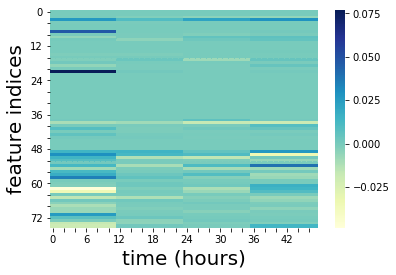

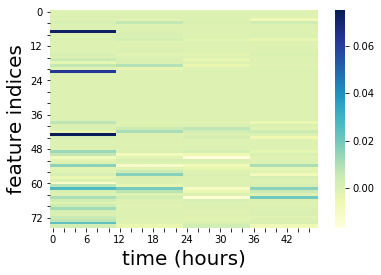

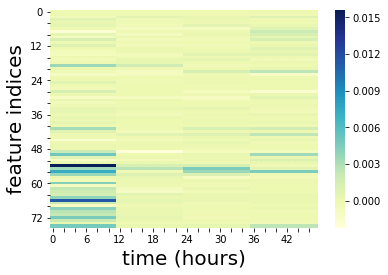

(Glascow coma scale verbal response-5 Oriented, 1, index43) & (Fraction inspired oxygen, 1, index3) & (Respiratory rate, 0, index54)\\
(Glascow coma scale eye opening-4 Spontaneously, 1, index7) & (Glascow coma scale motor response-6 Obeys Commands, 1, index21) & (Temperature, 0, index56)\\
(Glascow coma scale motor response-6 Obeys Commands, 1, index21) & (Glucose, 1, index49) & (mask-Glucose, 0, index66)\\
(mask-Glascow coma scale eye opening, 1, index62) & (Glascow coma scale verbal response-Confused, -1, index39) & (Systolic blood pressure, 0, index55)\\
(Height, -0, index51) & (Respiratory rate, 1, index54) & (Heart Rate, 0, index50)\\
(mask-Weight, 0, index74) & (Glascow coma scale eye opening-4 Spontaneously, 1, index7) & (mask-pH, 0, index75)\\
(mask-Glascow coma scale verbal response, 0, index65) & (mask-Glascow coma scale eye opening, -1, index62) & (Glascow coma scale verbal response-Oriented, 0, index41)\\
(Glascow coma scale verbal response-No Response-ETT, 0, index42) & (

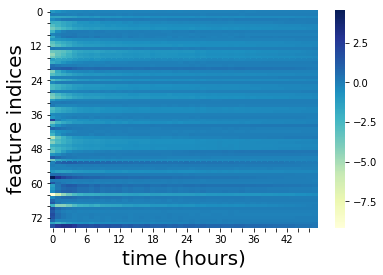

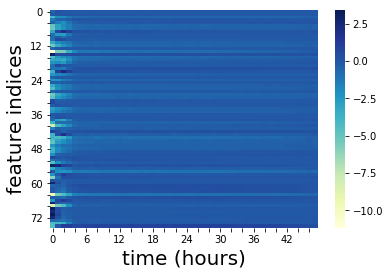

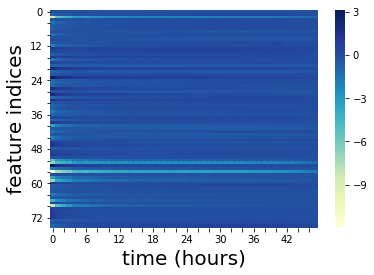

(mask-Glascow coma scale total, -63, index64) & (mask-Glascow coma scale total, -73, index64) & (Temperature, -177, index56)\\
(Glascow coma scale motor response-Abnormal extension, -60, index14) & (mask-pH, 55, index75) & (Oxygen saturation, -124, index53)\\
(Glascow coma scale verbal response-Incomprehensible sounds, -47, index44) & (mask-Height, -51, index68) & (Diastolic blood pressure, -112, index2)\\
(Temperature, -49, index56) & (Glascow coma scale motor response-Abnormal extension, -46, index14) & (mask-Capillary refill rate, -52, index59)\\
(mask-pH, 36, index75) & (Glascow coma scale total-3, -43, index30) & (mask-Height, -46, index68)\\
(Glascow coma scale motor response-4 Flex-withdraws, -37, index16) & (Glascow coma scale motor response-4 Flex-withdraws, -42, index16) & (Mean blood pressure, -44, index52)\\
(Glascow coma scale total-14, -36, index29) & (Glascow coma scale motor response-No response, -39, index15) & (Glascow coma scale motor response-2 Abnorm extensn, 35, i

In [146]:
def complete_diff(diff):
    res = diff.copy()
    for i in range(len(diff)): # feature
        v = 0
        for t in range(len(diff[0])): # time
            if diff[i][t] != 0:
                v = diff[i][t]
            res[i][t] = v
    return res

def plot_grad(grad, title="", criteria=lambda x: True, normalize=False, vmin=None, vmax=None):
    if normalize:
        grad = grad / np.abs(grad).max(1).reshape(48, 1)

    sns.heatmap(grad.T, cmap="YlGnBu", vmin=vmin, vmax=vmax)
    plt.xlabel('time (hours)', fontsize=20)
    plt.ylabel('feature indices', fontsize=20)
    #plt.title(title, fontsize=15) 
    
    plt.xticks(rotation=0)
    every_nth = 3
    for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)    
    for n, label in enumerate(plt.gca().yaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)    
            
    if title:
        plt.savefig('figures/vis_{}.eps'.format(title.replace(" ", "_")), bbox_inches='tight')    
    plt.show()
    
    feature_importance = grad.sum(0)
    delta = (grad[-1] - grad[0])
    sorted_list = list(map(lambda x: (index_to_name[x], feature_importance[x], x), 
                           np.argsort( 
                               np.abs(feature_importance) + np.abs(delta)
                           )))[::-1]
    
    
    return [n for n in sorted_list if criteria(n)]



#perm_ARF = complete_diff(np.load('diff/diff_ARF.npy')).T
#perm_shock = complete_diff(np.load('diff/diff_shock.npy')).T
#perm_IHM = complete_diff(np.load('diff/diff_mortality.npy')).T

perm_ARF = -complete_diff(np.load('diff_ARF.npy')).T
perm_shock = -complete_diff(np.load('diff_shock.npy')).T
perm_IHM = -complete_diff(np.load('diff_mortality.npy')).T

not_discrete = lambda n: True #'->' not in n[0]
arf = plot_grad(perm_ARF, "perm ARF mixLSTM-weight", 
                criteria=not_discrete)
shock = plot_grad(perm_shock, "perm shock mixLSTM-weight")
mort = plot_grad(perm_IHM, "perm mortality mixLSTM-weight")

for s, a, m in list(zip(shock, arf, mort))[:10]:
    print(' & '.join(map(lambda x: '({}, {:.0f}, index{})'.format(x[0].replace('->','-'), 
                                                         x[1], x[2]),[s, a, m])) + r"\\")

arf = plot_grad(grad_ARF, "ARF mixLSTM-weight", criteria=not_discrete)
shock = plot_grad(grad_shock, "shock mixLSTM-weight", criteria=not_discrete)
mort = plot_grad(grad_IHM, "mortality mixLSTM-weight", criteria=not_discrete)

for s, a, m in list(zip(shock, arf, mort))[:10]:
    print(' & '.join(map(lambda x: '({}, {:.0f}, index{})'.format(x[0].replace('->','-'), 
                                                         x[1], x[2]),[s, a, m])) + r"\\")

In [26]:
grad_IHM = grad_visualize('IHM/save/real_mow-2')
grad_shock = grad_visualize('shock/save/Shock_mow-2')
grad_ARF = grad_visualize('shock/save/ARF_mow-2')

IHM/save/real_mow-2
IHM/save/real_mow-2.ckpt
d: 76, h: 150


  0%|          | 0/404 [00:00<?, ?it/s]/home/jiaxuan/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:179: RuntimeWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
  self.dropout, self.training, self.bidirectional, self.batch_first)
100%|██████████| 404/404 [01:06<00:00,  6.06it/s]


shock/save/Shock_mow-2
shock/save/Shock_mow-2.ckpt
d: 76, h: 150


100%|██████████| 98/98 [00:16<00:00,  5.95it/s]


shock/save/ARF_mow-2
shock/save/ARF_mow-2.ckpt
d: 76, h: 50


100%|██████████| 68/68 [00:11<00:00,  6.12it/s]


In [134]:
import pandas as pd

def prepare_result_csv(grad, name): # grad is 48 x 76
    feature_importance = grad.mean(0)
    delta = (grad[-1] - grad[0]) # positive means increasing risk, negative means reducing risk
    indices = np.arange(len(feature_importance))
    df_dict = {
        'overall importance': feature_importance, 
        'delta from hour 1 to hour 48': delta,
        'feature': index_to_name
    }
    for i in range(len(grad)):
        df_dict['importance@{}'.format(i)] = grad[i]
    df = pd.DataFrame(df_dict)
    df.to_csv(name, index=False)
    
#prepare_result_csv(grad_IHM, "mortality.csv")
#prepare_result_csv(grad_ARF, "ARF.csv")
#prepare_result_csv(grad_shock, "shock.csv")

prepare_result_csv(perm_IHM, "perm_mortality.csv")
prepare_result_csv(perm_ARF, "perm_ARF.csv")
prepare_result_csv(perm_shock, "perm_shock.csv")

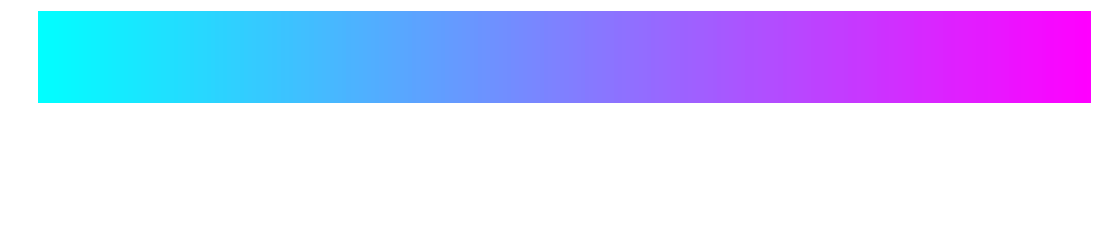

In [165]:
# for color pallete illustration
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    #axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        #fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    fig.set_size_inches(18.5, 3)
    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


plot_color_gradients('lll', ['cool'], 2)
#for cmap_category, cmap_list in cmaps.items():
#    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
args={'T':30,'k':10}

In [52]:
# Bring in Synth Info
synthnum = 5
synth_df = pd.DataFrame({'k':[]})
for modelname in ['LSTM11o'+str(x) for x in range(9,14)]: 
    for run in range(synthnum):
        synth = np.load('/data1/jeeheh/'+modelname+'_model'+str(run)+'.npz')
        synth = pd.DataFrame({'k':[synth['k']], 'delta':[synth['delta']], 'd_dist':[synth['d_dist']], 'k_dist':[synth['k_dist']], 'genmodelname':[modelname], 'synthnum':[int(run)]})
        synth_df = synth_df.append(synth, sort=True)

In [53]:
# Calculate Average Cosine Similarity
mean_cos_sim=[]
for x, k, d in zip(synth_df['k_dist'], synth_df['k'], synth_df['d_dist']):
    cos_sim = []
    x = x[k:]
    d = d[k:]
    for a, b in zip(x[1:],x[:-1]):
        cos_sim.append(np.dot(a,b,)/(np.linalg.norm(a)*np.linalg.norm(b)))
    for a, b in zip(d[1:],d[:-1]):
        cos_sim.append(np.dot(a,b,)/(np.linalg.norm(a)*np.linalg.norm(b)))
    mean_cos_sim.append(np.mean(cos_sim))
synth_df['mean_cos_sim']=mean_cos_sim

In [54]:
df = pd.DataFrame({'mode':[]})

for modelname in ['LSTM11q'+str(x) for x in range(1,6)]: 
    df = df.append(np.load('/data1/jeeheh/'+modelname+'_data_search.pickle'),sort=True)
    df.loc[pd.isnull(df.loc[:,'mode'])==True,'mode'] = modelname

In [57]:
for i in ['moo','mow']:#, 'lstm']:
    for genmodelname, delta in [('LSTM11o9','0.00'),('LSTM11o10','0.10'),('LSTM11o11','0.20'),('LSTM11o12','0.30'),('LSTM11o13','0.40')]: 
        zdf = np.load('/data1/mimic/jeeheh_code/jiaxuan_code/synthetic/save/'+i+'-'+delta+'_data_search.pickle')
        zdf['mode']='Jiaxuan'
        if i=='lstm': zdf['model']='new LSTM'
        df = df.append(zdf,sort=True)

In [41]:
test_loss_t = np.empty((df.shape[0],args['T']-args['k']))
for ind,x in enumerate(df.test_loss_t):
    test_loss_t[ind]=x
for i in range(args['T']-args['k']):
    df['test_loss_'+str(i)] = test_loss_t[:,i]

df['delta'] = [x.item() for x in df.delta]

In [42]:
df.loc[df.model=='truerandom',['delta','test_loss']].groupby('delta').mean()

,test_loss
delta,
0.0,33.932086
0.1,32.823817
0.2,34.415386
0.3,32.919517
0.4,32.512307


In [43]:
df.model=[x.replace('nidLSTM','Time Variant LSTM') for x in df.model]
df=df.loc[(df.model!='Avg Distb Baseline')&(df.model!='random')&(df.model!='truerandom'),:]

In [44]:
df.columns

Index(['N', 'delta', 'epoch', 'genmodelname', 'hidden_size', 'hyp_hidden_size',
       'kvdims', 'l2', 'mode', 'model', 'modelname', 'num_filters',
       'num_params', 'rLSTM_init', 'rLSTM_sigma', 'ratio', 'synthnum',
       'test_loss', 'test_loss_t', 'val_loss', 'val_loss_t', 'test_loss_0',
       'test_loss_1', 'test_loss_2', 'test_loss_3', 'test_loss_4',
       'test_loss_5', 'test_loss_6', 'test_loss_7', 'test_loss_8',
       'test_loss_9', 'test_loss_10', 'test_loss_11', 'test_loss_12',
       'test_loss_13', 'test_loss_14', 'test_loss_15', 'test_loss_16',
       'test_loss_17', 'test_loss_18', 'test_loss_19'],
      dtype='object')

In [45]:
df = df.merge(synth_df.loc[:,['genmodelname','synthnum','mean_cos_sim']], 'left', on=['genmodelname','synthnum'])

In [46]:
df.groupby(['genmodelname','synthnum','N','model','delta'],as_index=False).size()

genmodelname  synthnum  N       model                delta
LSTM11o10     0.0       1000.0  LSTM                 0.1      40
                                Time Variant LSTM 1  0.1      40
                                mooLSTM              0.1      40
                                mowLSTM              0.1      40
                                new LSTM             0.1      41
              1.0       1000.0  LSTM                 0.1      40
                                Time Variant LSTM 1  0.1      40
                                mooLSTM              0.1      40
                                mowLSTM              0.1      40
                                new LSTM             0.1      41
              2.0       1000.0  LSTM                 0.1      40
                                Time Variant LSTM 1  0.1      40
                                mooLSTM              0.1      40
                                mowLSTM              0.1      40
                               

In [47]:
df['mcs_bin']= pd.qcut(df['mean_cos_sim'], 5, labels=[5,4,3,2,1])
df['mcs_bin_range']= pd.qcut(df['mean_cos_sim'], 5)

In [48]:
zdf = df.sort_values('val_loss',ascending=True).drop_duplicates(['synthnum','genmodelname','N','model'])

In [30]:
plt.scatter(zdf.mean_cos_sim, zdf.delta)
plt.xlabel('Mean Cosine Sim')
plt.ylabel('Delta')

Text(0,0.5,'Delta')

In [31]:
# Bootstrapping Error
from LSTM11q_functions import do_bootstrap 

ziter = zdf.loc[:,['mode','model','synthnum']].drop_duplicates().reset_index()
for i in range(ziter.shape[0]):
    mode = ziter.loc[i,'mode']
    model = ziter.loc[i,'model']
    synthnum = ziter.loc[i,'synthnum']
    synthnum2 = str(int(synthnum))
    model2 = model.replace('Time Variant LSTM','nidLSTM')
    
    if model=='mooLSTM': continue
    if model=='mowLSTM': continue
        
    bs_data = np.load('/data1/jeeheh/'+mode+'_'+synthnum2+'_'+model2+'_testscores.npz')
    args = bs_data['args'].item()
    lower, val, upper = do_bootstrap(bs_data['pred'], bs_data['y_true'], args)
    zdf.loc[(zdf['mode']==mode)&(zdf.model==model)&(zdf['synthnum']==synthnum),'lower'] = lower
    zdf.loc[(zdf['mode']==mode)&(zdf.model==model)&(zdf['synthnum']==synthnum),'test loss 2'] = val
    zdf.loc[(zdf['mode']==mode)&(zdf.model==model)&(zdf['synthnum']==synthnum),'upper'] = upper
    

ImportError: No module named 'LSTM11q_functions'

In [26]:
# no run
zdf.loc[:,['N', 'delta', 'genmodelname', 'hidden_size', 'mode', 'model', 'modelname',
       'num_params','synthnum',
       'test_loss', 'val_loss', 'mean_cos_sim', 'lower', 'test loss 2', 'upper']]

,N,delta,genmodelname,hidden_size,mode,model,modelname,num_params,synthnum,test_loss,val_loss,mean_cos_sim,lower,test loss 2,upper
3118,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mowLSTM,mow-0.00,155619292.0,2.0,0.110021,0.106973,1.000000,NaN,NaN,NaN
2052,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mooLSTM,moo-0.00,9726262.0,1.0,0.137141,0.153425,1.000000,NaN,NaN,NaN
3151,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mowLSTM,mow-0.00,155619292.0,3.0,0.124650,0.155792,1.000000,NaN,NaN,NaN
3000,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mowLSTM,mow-0.00,155619292.0,0.0,0.181949,0.163178,1.000000,NaN,NaN,NaN
3076,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mowLSTM,mow-0.00,155619292.0,1.0,0.186355,0.171460,1.000000,NaN,NaN,NaN
2132,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mooLSTM,moo-0.00,9726262.0,3.0,0.136166,0.173012,1.000000,NaN,NaN,NaN
2013,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mooLSTM,moo-0.00,9726262.0,0.0,0.178717,0.178639,1.000000,NaN,NaN,NaN
2092,1000.0,0.0,LSTM11o9,1100.0,Jiaxuan,mooLSTM,moo-0.00,9726262.0,2.0,0.224305,0.230274,1.000000,NaN,NaN,NaN
3280,1000.0,0.1,LSTM11o10,1100.0,Jiaxuan,mowLSTM,mow-0.10,155619292.0,2.0,0.737617,0.664084,0.961323,NaN,NaN,NaN
3442,1000.0,0.2,LSTM11o11,1100.0,Jiaxuan,mowLSTM,mow-0.20,155619292.0,1.0,0.848589,0.825654,0.906721,NaN,NaN,NaN


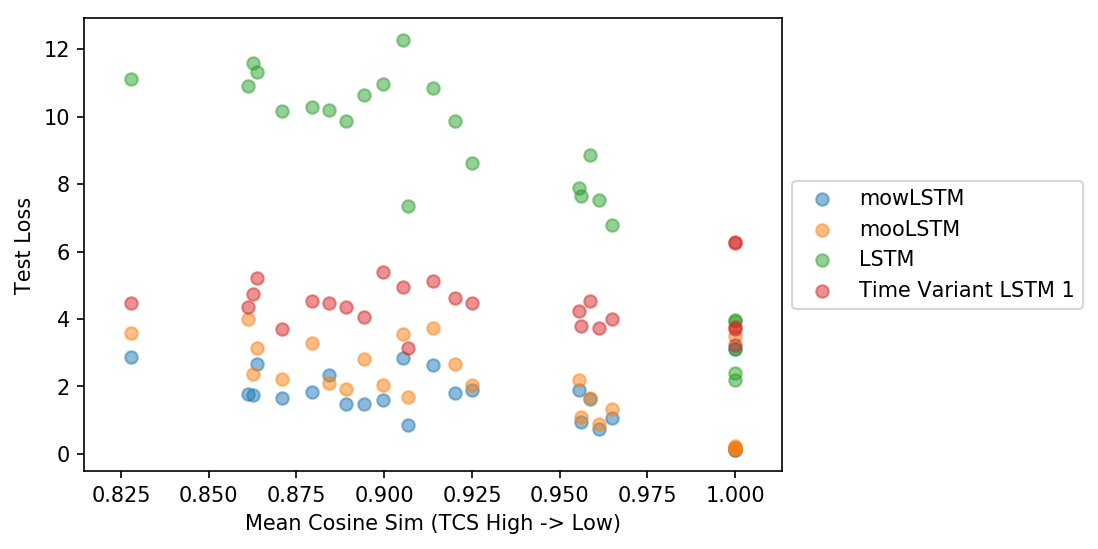

In [27]:
# Scatter
fig,ax=plt.subplots(1,1,dpi=150)
for model in zdf.model.unique():
    zdf2 = zdf.loc[zdf.model==model,:].sort_values('mean_cos_sim')
    plt.scatter(zdf2['mean_cos_sim'],zdf2['test_loss'], label=model, alpha=.5)
plt.xlabel('Mean Cosine Sim (TCS High -> Low)')
plt.ylabel('Test Loss')
# plt.ylim(0,.001)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/home/jiaxuan/venv/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/jiaxuan/venv/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


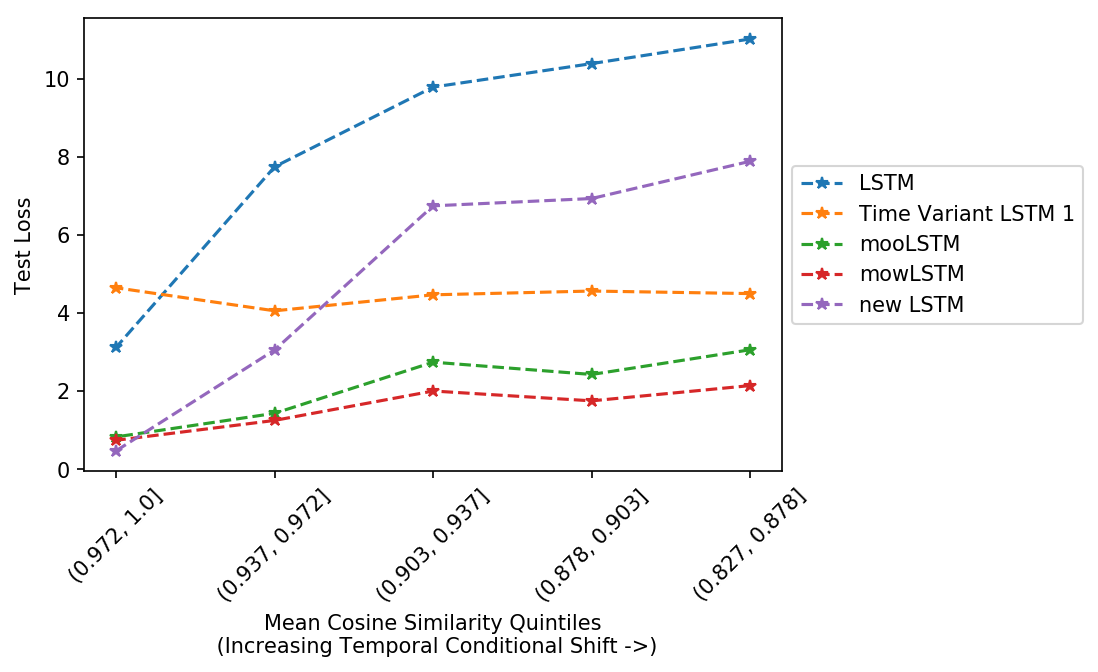

In [49]:
# Avg Bin Perf
zdf2 = zdf.groupby(['mcs_bin','model'],as_index=False).mean()
zdf2 = zdf2.merge(zdf.loc[:,['mcs_bin','mcs_bin_range']].drop_duplicates(), how='left', on='mcs_bin')

fig,ax=plt.subplots(1,1,dpi=150)
for model in zdf2.model.unique():
#     if model in ['Time Variant LSTM','Time Variant LSTM2 1','Time Variant LSTM2 5','Time Variant LSTM 1.5','Time Variant LSTM 2','Time Variant LSTM 3']: continue
    zdf3 = zdf2.loc[(zdf2.model==model),:]
    plt.plot(zdf3['mcs_bin'].as_matrix(),zdf3['test_loss'].as_matrix(),'*--',label=model)
    plt.xticks(zdf3['mcs_bin'].as_matrix(), zdf3['mcs_bin_range'].as_matrix(),rotation=45)
plt.xlabel('Mean Cosine Similarity Quintiles\n (Increasing Temporal Conditional Shift ->)')
plt.ylabel('Test Loss')
# # plt.ylim(.002,.008)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
zdf.loc[(zdf.model=='LSTMT')|(zdf.model=='Time Variant LSTM 1'),['N', 'delta', 'epoch', 'genmodelname', 'hidden_size', 
       'l2', 'mode', 'model', 'modelname', 'synthnum', 'mean_cos_sim', 'mcs_bin', 'mcs_bin_range']].sort_values(['genmodelname','synthnum'])

,N,delta,epoch,genmodelname,hidden_size,l2,mode,model,modelname,synthnum,mean_cos_sim,mcs_bin,mcs_bin_range
453,1000.0,0.1,29.0,LSTM11o10,1100.0,NaN,LSTM11q2,Time Variant LSTM 1,LSTM11q2,0.0,0.956201,2,"(0.937, 0.972]"
525,1000.0,0.1,30.0,LSTM11o10,1100.0,NaN,LSTM11q2,Time Variant LSTM 1,LSTM11q2,1.0,0.955555,2,"(0.937, 0.972]"
614,1000.0,0.1,30.0,LSTM11o10,1100.0,NaN,LSTM11q2,Time Variant LSTM 1,LSTM11q2,2.0,0.961323,2,"(0.937, 0.972]"
713,1000.0,0.1,30.0,LSTM11o10,1100.0,NaN,LSTM11q2,Time Variant LSTM 1,LSTM11q2,3.0,0.958769,2,"(0.937, 0.972]"
763,1000.0,0.1,28.0,LSTM11o10,1100.0,NaN,LSTM11q2,Time Variant LSTM 1,LSTM11q2,4.0,0.964822,2,"(0.937, 0.972]"
859,1000.0,0.2,30.0,LSTM11o11,1100.0,NaN,LSTM11q3,Time Variant LSTM 1,LSTM11q3,0.0,0.920280,3,"(0.903, 0.937]"
950,1000.0,0.2,29.0,LSTM11o11,1100.0,NaN,LSTM11q3,Time Variant LSTM 1,LSTM11q3,1.0,0.906721,3,"(0.903, 0.937]"
1025,1000.0,0.2,28.0,LSTM11o11,1100.0,NaN,LSTM11q3,Time Variant LSTM 1,LSTM11q3,2.0,0.905334,3,"(0.903, 0.937]"
1114,1000.0,0.2,29.0,LSTM11o11,1100.0,NaN,LSTM11q3,Time Variant LSTM 1,LSTM11q3,3.0,0.914031,3,"(0.903, 0.937]"
1189,1000.0,0.2,30.0,LSTM11o11,1100.0,NaN,LSTM11q3,Time Variant LSTM 1,LSTM11q3,4.0,0.925059,3,"(0.903, 0.937]"


/home/jeeheh/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jeeheh/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


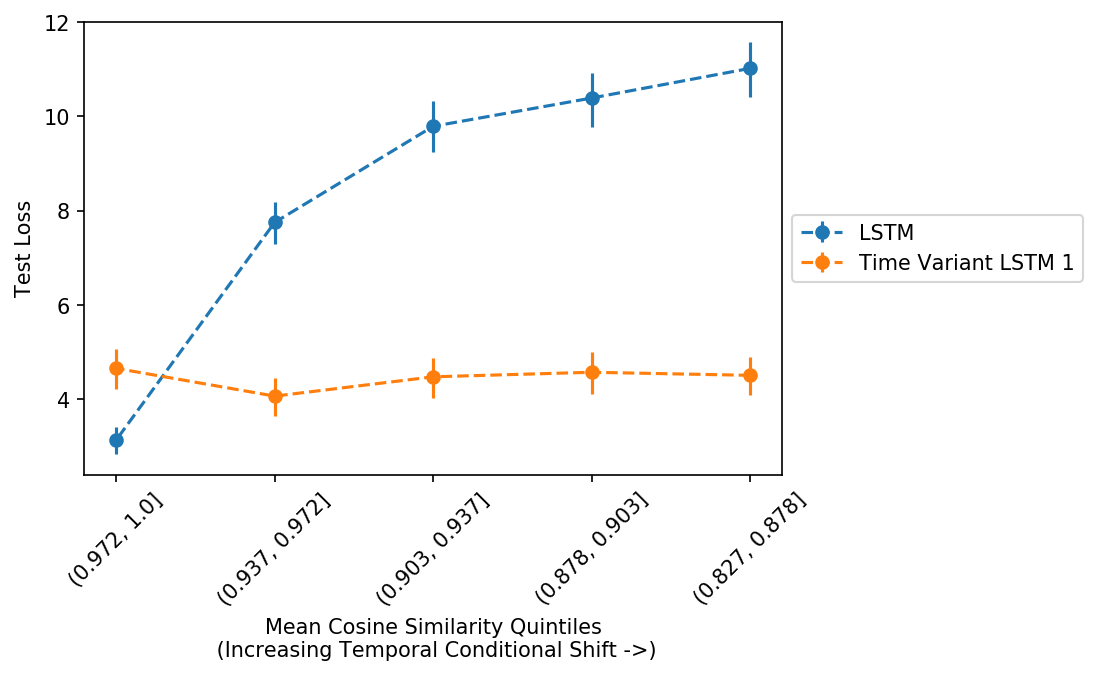

In [20]:
# Avg Bin Perf + Error Bars

zdf2 = zdf2.groupby(['mcs_bin','model'],as_index=False).mean()
zdf2 = zdf2.merge(zdf.loc[:,['mcs_bin','mcs_bin_range']].drop_duplicates(), how='left', on='mcs_bin')

fig,ax=plt.subplots(1,1,dpi=150)
for model in zdf2.model.unique():
#     if model in ['Time Variant LSTM','Time Variant LSTM2 1','Time Variant LSTM2 5','Time Variant LSTM 1.5','Time Variant LSTM 2','Time Variant LSTM 3']: continue
    zdf3 = zdf2.loc[(zdf2.model==model),:]
    plt.errorbar(zdf3['mcs_bin'].as_matrix(),zdf3['test_loss'].as_matrix(),\
                 yerr=[(zdf3['test_loss']-zdf3['lower']).as_matrix(),(zdf3['upper']-zdf3['test_loss']).as_matrix()],\
                 fmt='--o',label=model)
    plt.xticks(zdf3['mcs_bin'].as_matrix(), zdf3['mcs_bin_range'].as_matrix(),rotation=45)
plt.xlabel('Mean Cosine Similarity Quintiles\n (Increasing Temporal Conditional Shift ->)')
plt.ylabel('Test Loss')
# # plt.ylim(.002,.008)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))